# Recommender System: Collaborative filtering on Amazon Video Games & Products  dataset

#### -  User-based (user-user) collaborative filtering 
    
#### - Item-based (item-item) collaborative filtering 
    
#### - Evaluation
    
#### - Conclusion

#### - Context Based Filtering

## User-based collaborative filtering

### Loading libraries and files

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import gzip
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
import ast
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [27]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

input_data = getDF('Video_Games_5.json.gz')

#### High-level info of data

In [28]:
input_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [29]:
input_data.shape

(497577, 12)

In [30]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 46.0+ MB


/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


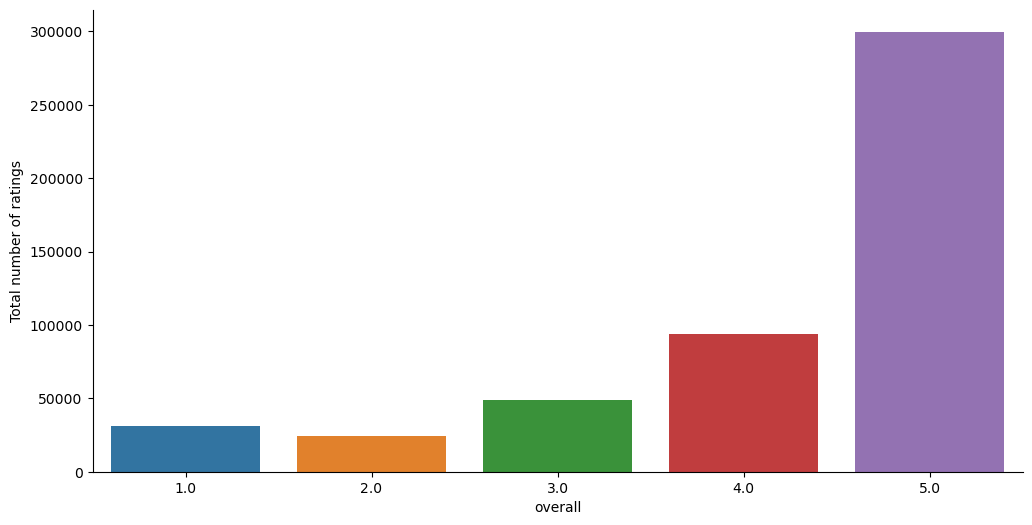

In [31]:
# distribution of ratings:
# Plotting with countplot
g = sns.countplot(x='overall', data=input_data)
g.set_ylabel("Total number of ratings")

# Option to resize the plot
g.figure.set_size_inches(12, 6)

# Show the plot
sns.despine()

Reading meta data to get Images of Products

In [32]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield ast.literal_eval(l.decode('utf-8'))

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

meta_data = getDF('meta_Video_Games.json.gz')

In [33]:
ratings = pd.merge(input_data, meta_data, on='asin', how='inner')

In [34]:
ratings.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN,"Anno 2070, the newest version of the award-win...",39.99,http://ecx.images-amazon.com/images/I/51R06L8c...,"{'also_bought': ['B005OM6CGU', 'B001AWMCMQ', '...",{'Video Games': 7621},"[[Video Games, PC, Games]]",NaN,NaN


In [35]:
ratings.shape

(359839, 20)

In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359839 entries, 0 to 359838
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         359839 non-null  float64
 1   verified        359839 non-null  bool   
 2   reviewTime      359839 non-null  object 
 3   reviewerID      359839 non-null  object 
 4   asin            359839 non-null  object 
 5   reviewerName    359792 non-null  object 
 6   reviewText      359765 non-null  object 
 7   summary         359770 non-null  object 
 8   unixReviewTime  359839 non-null  int64  
 9   vote            82725 non-null   object 
 10  style           199371 non-null  object 
 11  image           1322 non-null    object 
 12  description     355229 non-null  object 
 13  price           356767 non-null  float64
 14  imUrl           359118 non-null  object 
 15  related         358896 non-null  object 
 16  salesRank       356347 non-null  object 
 17  categories

In [37]:
# Filter rows where 'title' column has some values (not NaN or empty)
ratings = ratings[ratings['title'].notna() & (ratings['title'] != '')]

# Display the filtered DataFrame
print(ratings.shape)

(9172, 20)


In [38]:
ratings.rename(columns={'reviewerID': 'user_id', 'asin': 'product_id', 'overall':'rating'}, inplace=True)

### Train-test split

In [217]:
from sklearn.model_selection import train_test_split
# Assuming 'df' is your DataFrame
#sample_percentage = 0.1  # Adjust the percentage as needed
#sampled_data, _ = train_test_split(ratings, test_size=1-sample_percentage, stratify=ratings['rating'], random_state=42)

X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)
X_train.head()

(6420, 20)
(2752, 20)


,rating,verified,reviewTime,user_id,product_id,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand
72390,4.0,True,"12 3, 2013",AYE5PXGPBMGIR,B00030GSJY,SilkyGiant,haven't used it yet. but they do look nice. ev...,Good joystick,1386028800,NaN,NaN,NaN,The World's most advanced flight controller Th...,129.95,http://ecx.images-amazon.com/images/I/51QjKjzv...,"{'also_bought': ['B000H67DDY', 'B001DPZE84', '...",{},"[[Video Games, PC, Accessories, Controllers, F...",Saitek X52 Flight Control System,Mad Catz
297393,3.0,True,"01 13, 2016",A15ODZTIG450VU,B008BGXYBM,Neli Safur,ok,Three Stars,1452643200,NaN,{'Color:': ' Black'},NaN,,74.09,http://ecx.images-amazon.com/images/I/41X8qdl8...,"{'also_bought': ['B00ETHLTSM', 'B009SJR28W', '...",{},"[[Video Games, PC, Accessories, Gaming Mice]]",Razer Taipan Ambidextrous PC Gaming Mouse,Razer
143643,4.0,False,"06 5, 2009",A2ZYI54A6DWV9A,B000WU35JQ,Phatso420,I purchased this mouse specifically for gaming...,"Nice mouse, but worth it?",1244160000,NaN,NaN,NaN,Razer Lachesis Gaming Mouse RZ01-00170100-R3M1...,68.99,http://ecx.images-amazon.com/images/I/31afW2KE...,"{'also_viewed': ['B00AAS888S', 'B002Q4U5DK', '...",{'Electronics': 62689},"[[Video Games, More Systems, PlayStation 2, Ha...",Razer Lachesis 4000 dpi Laser Gaming Mouse (Ba...,NaN
189750,2.0,True,"11 13, 2013",A2Q1SMIMLQXW5M,B001B4EEW4,T. Hanson,"If you're like me, you probably bought some re...",Not very good.,1384300800,NaN,NaN,NaN,BATTERY COVER,2.86,http://ecx.images-amazon.com/images/I/31Eebw79...,"{'also_bought': ['B001E65P72', 'B0011E4J7O', '...",{'Video Games': 1304},"[[Video Games, Xbox 360, Accessories, Batterie...","Generic Xbox 360 Controller Battery Cover, White",Generic
43541,5.0,True,"08 8, 2016",A27T7KSGJM2QZL,B00006B84X,Ross Smyth,This stick is awesome. So far there is one fla...,Best stick I've ever used,1470614400,NaN,NaN,NaN,,99.99,http://ecx.images-amazon.com/images/I/310CCHXY...,"{'also_bought': ['B00006B84Z', 'B0000512IE', '...",{},"[[Video Games, Mac, Accessories, Controllers, ...",CH Products Fighterstick USB,CH Products


In [41]:
# Assuming df is your original DataFrame
# Aggregate ratings based on 'user_id' and 'product_id'
X_train_aggregated = X_train.groupby(['user_id', 'product_id']).agg({'rating': 'mean'}).reset_index()

# Pivot ratings into video game features
user_data = X_train_aggregated.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
user_data.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A100O5QLORBZRO,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101D5E9YITTAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101KEWWK0P2GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102IFY2XPGAAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102MU6ZC9H1N6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
user_data.shape

(5333, 294)

### Create a Copy of train and test dataset
These datasets will be used for prediction and evaluation.

Dummy train will be used later for prediction of the video games which has not been rated by the user. To ignore the video games rated by the user, we will mark it as 0 during prediction. The video games not rated by user is marked as 1 for prediction.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [43]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
# Assuming dummy_train is your original DataFrame
# Pivot ratings into movie features, using mean as an example aggregation function
dummy_train = dummy_train.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='mean').fillna(1)
dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='mean').fillna(1)

In [45]:
dummy_train.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A100O5QLORBZRO,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A101D5E9YITTAZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A101KEWWK0P2GG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A102IFY2XPGAAH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A102MU6ZC9H1N6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [46]:
dummy_test.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A103B6MQ5IF2BK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A105S56ODHGJEK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A107WWEC4EWOR5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A1095MQERRUBWI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A109UMT39D6EPF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User-User Similarity matrix

#### Using Cosine similarity

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
print(user_similarity)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [48]:
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity.shape)

(5333, 5333)


###  Predicting the User ratings on the video games

In [49]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[117.38201358,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          3.53553391,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [74]:
user_predicted_ratings.shape

(5333, 294)

We do not want to recommend the same video game that the user already watched. We are interested only in the video games not rated by the user, we will ignore the video games rated by the user.
This is where we will use our dummy train matrix that we previously built. 

In [51]:
# np.multiply for cell-by-cell multiplication 
user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A100O5QLORBZRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
A101D5E9YITTAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,2.4,0.0,0.000000,0.0
A101KEWWK0P2GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
A102IFY2XPGAAH,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,...,0.0,0.0,0.0,0.0,6.24695,0.0,0.0,0.0,1.788854,0.0
A102MU6ZC9H1N6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


In [52]:
dummy_train.shape

(5333, 294)

### Top 5 recommendations for the User 10

In [53]:
user_final_ratings.iloc[10].sort_values(ascending = False)[0:5]

product_id
B00BBUCCKO    3.535534
B001B4EEW4    2.572479
B00F8W9SWQ    2.572479
B003NVMEVQ    2.461830
B00EWEHI5K    2.461830
Name: A109BH0Z37BRD6, dtype: float64

In [54]:
user_final_ratings_long = pd.melt(user_final_ratings.reset_index(), id_vars=['user_id'], var_name='product_id', value_name='rating')
print(user_final_ratings_long.head())

          user_id  product_id  rating
0  A100O5QLORBZRO  9882155456     0.0
1  A101D5E9YITTAZ  9882155456     0.0
2  A101KEWWK0P2GG  9882155456     0.0
3  A102IFY2XPGAAH  9882155456     2.4
4  A102MU6ZC9H1N6  9882155456     0.0


In [55]:
print(user_final_ratings_long.shape)

(1567902, 3)


In [56]:
def get_top_products_for_user(df, df_product_data, user_id, top_n=5):
    user_df = df[df['user_id'] == user_id]
    top_products = user_df.sort_values(by='rating', ascending=False).head(top_n)
    currently_watching = X_train[X_train['user_id']==user_id][['product_id','title','imUrl']]                           
    print("USER IS CURRENTLY PLAYING")
    print(currently_watching[['title','imUrl']])
    print("---------------------------------------------------------------------------------")
    
    # Filter df_product_data for the specific user's top products
    top_products_imgurls = df_product_data[df_product_data['product_id'].isin(top_products['product_id'])]

    #Select only the desired columns
    top_products_imgurls = top_products_imgurls[['product_id', 'title','imUrl']].drop_duplicates()
    
    #Final DF:
    result = pd.merge(top_products, top_products_imgurls, on='product_id', how='inner')
    #print(f"VIDEO GAMES RECOMMENDED FOR USER {user_id_to_select}")
    return result[['title','imUrl']]
user_id_to_select = 'A11MBF70SQV8BH'
top_products_imgurls = get_top_products_for_user(user_final_ratings_long, X_train, user_id_to_select, top_n=5)
print(f"VIDEO GAMES RECOMMENDED FOR USER {user_id_to_select}:\n{top_products_imgurls}")

USER IS CURRENTLY PLAYING
                                      title  \
353327  KontrolFreek FPS Freek Vortex - PS4   

                                                    imUrl  
353327  http://ecx.images-amazon.com/images/I/51sF48Aq...  
---------------------------------------------------------------------------------
VIDEO GAMES RECOMMENDED FOR USER A11MBF70SQV8BH:
                                               title  \
0                       KontrolFreek FPS Ultra - PS4   
1  Corsair Vengeance K70 Mechanical Gaming Keyboa...   
2       Mad Catz R.A.T.7 Gaming Mouse for PC and Mac   
3  HDE Controller Shell Case Cover Replacement Ki...   
4  Black 250GB 250 GB Hard Drive Disk HDD for Xbo...   

                                               imUrl  
0  http://ecx.images-amazon.com/images/I/51cSjX71...  
1  http://ecx.images-amazon.com/images/I/51ALOlVL...  
2  http://ecx.images-amazon.com/images/I/41FjQnmp...  
3  http://ecx.images-amazon.com/images/I/51oR8Der...  
4  http://ecx.im

In [57]:
import pickle

In [58]:
pickle.dump(user_final_ratings_long.to_dict(),open('user_ratings.pkl','wb')) #Not able to transfer Pandas DF through pickle so converting it to dictionary

In [59]:
pickle.dump(X_train.to_dict(),open('dataset.pkl','wb')) #Not able to transfer Pandas DF through pickle so converting it to dictionary

## Item-based collaborative filtering

In [144]:
# Pivot ratings into video game features
video_game_features = X_train_aggregated.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
video_game_features.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A100O5QLORBZRO,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101D5E9YITTAZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101KEWWK0P2GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102IFY2XPGAAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102MU6ZC9H1N6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
# Calculate the item-item similarity
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(video_game_features.T)

product_similarity_df = pd.DataFrame(item_similarity, index=video_game_features.columns, columns=video_game_features.columns)

#np.fill_diagonal(item_similarity, 0)
#item_similarity_df = pd.DataFrame(item_similarity, index=video_game_features.index, columns=video_game_features.index)
#item_similarity_df.head()

In [201]:
# Function to get top N similar products based on cosine similarity
def get_top_similar_products(product_id, similarity_df, n=5):
    similar_products = similarity_df[product_id].sort_values(ascending=False)[1:n+1]
    
    # Convert the Series to a DataFrame and reset the index
    similar_products_df = similar_products.reset_index()
    
    # Rename the columns if needed
    similar_products_df.columns = ['product_id', 'cosine_similarity']
    
    return similar_products_df


In [203]:
similar_products = get_top_similar_products('9882155456', product_similarity_df, n=5)
print(similar_products)

   product_id  cosine_similarity
0  B0058FLZG0           0.062145
1  B0009KKVVE           0.054601
2  B00BCEK2LA           0.033454
3  B00CJD4HD2           0.030500
4  B00FNKMVUO           0.020033


In [195]:
pickle.dump(product_similarity_df.to_dict(),open('product_similarity_df.pkl','wb')) #Not able to transfer Pandas DF through pickle so converting it to dictionary

In [157]:
X_train[['product_id']]
#X_train_aggregated[X_train_aggregated['product_id'].isin(top_products['product_id'])]

,product_id
72390,B00030GSJY
297393,B008BGXYBM
143643,B000WU35JQ
189750,B001B4EEW4
43541,B00006B84X
...,...
288516,B006W3ZXEW
256022,B004UI3FPA
279501,B005IGPY48
72299,B00030AX3Q


In [193]:
def get_top_products_for_items(df,product_id):
    product_df = X_train[X_train['product_id'] == product_id]
    current_products = X_train[X_train['product_id']==product_id][['product_id','title','imUrl']]
    current_products = current_products.drop_duplicates()
    return current_products[['title']]

In [194]:
get_top_products_for_items(X_train,'B000052WM0')

,title
25226,Gravis Eliminator GamePad Pro (PC/USB Mac)


### Item-Item Similarity matrix

#### Using Cosine similarity

### Predicting the User ratings on the movies 

In [62]:
item_predicted_ratings = np.dot(video_game_features.T, item_similarity)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.29456319,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
item_predicted_ratings.shape

(5333, 294)

In [64]:
dummy_train.shape

(5333, 294)

#### Filtering the ratings only for the video games not already rated by the user for recommendation

In [65]:
# np.multiply for cell-by-cell multiplication 
item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A100O5QLORBZRO,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
A101D5E9YITTAZ,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.083157,0.0,0.000000,0.0
A101KEWWK0P2GG,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
A102IFY2XPGAAH,0.036858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067427,...,0.0,0.0,0.0,0.0,0.075692,0.0,0.000000,0.0,0.048553,0.0
A102MU6ZC9H1N6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


### Top 5 video game recommendations for the User 42

In [66]:
item_final_ratings.iloc[15].sort_values(ascending = False)[0:5]

product_id
B00EOPT5ZS    0.313445
B008YRITPO    0.206954
B000WU35JQ    0.201678
B00AJILG1K    0.194399
B005DKZSVS    0.164905
Name: A10B6G6W3DW1EY, dtype: float64

In [67]:
item_final_ratings = pd.melt(item_final_ratings.reset_index(), id_vars=['user_id'], 
                             var_name='product_id', value_name='rating')
print(item_final_ratings.head())

          user_id  product_id    rating
0  A100O5QLORBZRO  9882155456  0.000000
1  A101D5E9YITTAZ  9882155456  0.000000
2  A101KEWWK0P2GG  9882155456  0.000000
3  A102IFY2XPGAAH  9882155456  0.036858
4  A102MU6ZC9H1N6  9882155456  0.000000


In [68]:
pickle.dump(item_final_ratings.to_dict(),open('items_ratings.pkl','wb')) #Not able to transfer Pandas DF through pickle so converting it to dictionary

In [69]:
def get_top_products_for_items(df,df_product_data,top_n=5):
    product_df = df[df['product_id'] == product_id]
    top_products = product_df.sort_values(by='rating', ascending=False).head(top_n)
    currently_watching = X_train[X_train['product_id']==product_id][['product_id','title','imUrl']]
    return currently_watching[['title','imUrl']]



product_id = '9882155456'
print(get_top_products_for_items(item_final_ratings,X_train))
#, df_product_data, product_id, top_n=5
#top_products_imgurls = get_top_products_for_items(item_final_ratings, X_train, user_id_to_select, top_n=5)
#print(f"VIDEO GAMES RECOMMENDED FOR USER {user_id_to_select}:\n{top_products_imgurls}")

                                                 title  \
191  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
172  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
186  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
182  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
189  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
181  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
163  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
175  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
164  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
179  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
173  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
192  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
177  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
168  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
184  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
170  2 Pack - Gator Crunch Wii Gamecube 6FT Extensi...   
158  2 Pack - 

In [70]:
def get_top_products_items(df, df_product_data, user_id, top_n=5):
    user_df = df[df['product_id'] == product_id]
    top_products = user_df.sort_values(by='rating', ascending=False).head(top_n)
    currently_watching = X_train[X_train['user_id']==user_id][['product_id','title','imUrl']]                           
    print("USER IS CURRENTLY PLAYING")
    print(currently_watching[['title','imUrl']])
    print("---------------------------------------------------------------------------------")
    
    # Filter df_product_data for the specific user's top products
    top_products_imgurls = df_product_data[df_product_data['product_id'].isin(top_products['product_id'])]

    #Select only the desired columns
    top_products_imgurls = top_products_imgurls[['product_id', 'title','imUrl']].drop_duplicates()
    
    #Final DF:
    result = pd.merge(top_products, top_products_imgurls, on='product_id', how='inner')
    #print(f"VIDEO GAMES RECOMMENDED FOR USER {user_id_to_select}")
    return result[['title','imUrl']]
user_id_to_select = 'A11MBF70SQV8BH'
top_products_imgurls = get_top_products_for_user(user_final_ratings_long, X_train, user_id_to_select, top_n=5)
print(f"VIDEO GAMES RECOMMENDED FOR USER {user_id_to_select}:\n{top_products_imgurls}")

USER IS CURRENTLY PLAYING
                                      title  \
353327  KontrolFreek FPS Freek Vortex - PS4   

                                                    imUrl  
353327  http://ecx.images-amazon.com/images/I/51sF48Aq...  
---------------------------------------------------------------------------------
VIDEO GAMES RECOMMENDED FOR USER A11MBF70SQV8BH:
                                               title  \
0                       KontrolFreek FPS Ultra - PS4   
1  Corsair Vengeance K70 Mechanical Gaming Keyboa...   
2       Mad Catz R.A.T.7 Gaming Mouse for PC and Mac   
3  HDE Controller Shell Case Cover Replacement Ki...   
4  Black 250GB 250 GB Hard Drive Disk HDD for Xbo...   

                                               imUrl  
0  http://ecx.images-amazon.com/images/I/51cSjX71...  
1  http://ecx.images-amazon.com/images/I/51ALOlVL...  
2  http://ecx.images-amazon.com/images/I/41FjQnmp...  
3  http://ecx.images-amazon.com/images/I/51oR8Der...  
4  http://ecx.im

## Evaluation

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the User instead of predicting it for the movie not rated by the user.

### Using User-User similarity 

In [116]:
#test_user_features = X_test.pivot(index = 'user_id', columns = 'product_id', values = 'rating').fillna(0)
# Aggregate ratings based on 'user_id' and 'product_id'
test_user_features = X_test.groupby(['user_id', 'product_id']).agg({'rating': 'mean'}).reset_index()

# Pivot ratings into video game features
test_user_features = test_user_features.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0


print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
- - - - - - - - - - 
(2544, 2544)


In [117]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Testing on the products already rated by the user

In [118]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A103B6MQ5IF2BK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A107WWEC4EWOR5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.535534,0.0,0.0,0.0,0.0,0.0
A1095MQERRUBWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A109UMT39D6EPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [79]:
ratings['rating'].describe()

count    9172.000000
mean        4.203227
std         1.191563
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (0.5, 5)

In [121]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred.shape)

(2544, 280)


/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [122]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

12626

In [125]:
# Aggregate ratings based on 'user_id' and 'product_id'
test_user_features = X_test.groupby(['user_id', 'product_id']).agg({'rating': 'mean'}).reset_index()
# Pivot ratings into video game features
test = test_user_features.pivot(index='user_id', columns='product_id', values='rating').fillna(0)
test.head()

(2544, 280)

In [126]:
# RMSE Score
print(test.shape)
print(pred.shape)
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

(2544, 280)
(2544, 280)
1.2089719931369496


In [127]:
# Mean abslute error
mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

0.8648324959896878


It means that on an average our User-based recommendation engine is making an error of 0.8 in predicting the User ratings. 

Now, let's evaluate Item-based recommendation engine.

### Using Item-Item Similarity 

In [134]:
item_features = X_test.groupby(['user_id', 'product_id']).agg({'rating': 'mean'}).reset_index()
test_item_features = item_features.pivot(index = 'product_id', columns = 'user_id', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
- - - - - - - - - - 
(280, 280)


In [135]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Testing on the products already rated by the user

In [136]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

product_id,9882155456,B00000JDFT,B00000K11D,B00000K4CC,B00000K4TQ,B00004S1DZ,B00004U1R8,B00004VUFH,B00004VUGN,B0000512IE,...,B00HTX5SHQ,B00HUWA45W,B00HVYBWQO,B00I9GZZGG,B00IRHE892,B00IRRDD0M,B00ISW0TGW,B00IXHP3A4,B00J9A5O3U,B00JMQJV9E
user_id,,,,,,,,,,,,,,,,,,,,,
A103B6MQ5IF2BK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A107WWEC4EWOR5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.144113,0.0,0.0,0.0,0.0,0.0
A1095MQERRUBWI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
A109UMT39D6EPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [137]:
ratings['rating'].describe()

count    9172.000000
mean        4.203227
std         1.191563
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (0.5, 5)

In [138]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred.shape)

(2544, 280)


/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cdmstudent/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [139]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

12626

In [140]:
item_features = X_test.groupby(['user_id','product_id']).agg({'rating': 'mean'}).reset_index()
test = item_features.pivot(index = 'user_id', columns = 'product_id', values = 'rating').fillna(0)
test.shape

(2544, 280)

In [141]:
pred.shape

(2544, 280)

In [142]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

0.7091827863248938


In [143]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

0.5869613624451093


It means that on an average our Item-based recommendation engine is making an error of 0.58 in predicting the User ratings. 


## Conclusion


For the give dataset, the User-based collaborative filtering outperformed Item-based collaborative filtering.

# Content Based Filtering:

In [218]:
data = X_train.copy()
data.dropna(subset=['title', 'description', 'price', 'reviewText', 'salesRank'], inplace=True)

,rating,verified,reviewTime,user_id,product_id,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,description,price,imUrl,related,salesRank,categories,title,brand
72390,4.0,True,"12 3, 2013",AYE5PXGPBMGIR,B00030GSJY,SilkyGiant,haven't used it yet. but they do look nice. ev...,Good joystick,1386028800,NaN,NaN,NaN,The World's most advanced flight controller Th...,129.95,http://ecx.images-amazon.com/images/I/51QjKjzv...,"{'also_bought': ['B000H67DDY', 'B001DPZE84', '...",{},"[[Video Games, PC, Accessories, Controllers, F...",Saitek X52 Flight Control System,Mad Catz
297393,3.0,True,"01 13, 2016",A15ODZTIG450VU,B008BGXYBM,Neli Safur,ok,Three Stars,1452643200,NaN,{'Color:': ' Black'},NaN,,74.09,http://ecx.images-amazon.com/images/I/41X8qdl8...,"{'also_bought': ['B00ETHLTSM', 'B009SJR28W', '...",{},"[[Video Games, PC, Accessories, Gaming Mice]]",Razer Taipan Ambidextrous PC Gaming Mouse,Razer
143643,4.0,False,"06 5, 2009",A2ZYI54A6DWV9A,B000WU35JQ,Phatso420,I purchased this mouse specifically for gaming...,"Nice mouse, but worth it?",1244160000,NaN,NaN,NaN,Razer Lachesis Gaming Mouse RZ01-00170100-R3M1...,68.99,http://ecx.images-amazon.com/images/I/31afW2KE...,"{'also_viewed': ['B00AAS888S', 'B002Q4U5DK', '...",{'Electronics': 62689},"[[Video Games, More Systems, PlayStation 2, Ha...",Razer Lachesis 4000 dpi Laser Gaming Mouse (Ba...,NaN
189750,2.0,True,"11 13, 2013",A2Q1SMIMLQXW5M,B001B4EEW4,T. Hanson,"If you're like me, you probably bought some re...",Not very good.,1384300800,NaN,NaN,NaN,BATTERY COVER,2.86,http://ecx.images-amazon.com/images/I/31Eebw79...,"{'also_bought': ['B001E65P72', 'B0011E4J7O', '...",{'Video Games': 1304},"[[Video Games, Xbox 360, Accessories, Batterie...","Generic Xbox 360 Controller Battery Cover, White",Generic
43541,5.0,True,"08 8, 2016",A27T7KSGJM2QZL,B00006B84X,Ross Smyth,This stick is awesome. So far there is one fla...,Best stick I've ever used,1470614400,NaN,NaN,NaN,,99.99,http://ecx.images-amazon.com/images/I/310CCHXY...,"{'also_bought': ['B00006B84Z', 'B0000512IE', '...",{},"[[Video Games, Mac, Accessories, Controllers, ...",CH Products Fighterstick USB,CH Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288516,5.0,True,"07 11, 2014",A76YOYRT8FQ0U,B006W3ZXEW,TAD,huge fan of Razer since the boomslang. The be...,The best gaming mice for the price i am a poet...,1405036800,NaN,{'Style:': ' Hex Red'},NaN,,69.99,http://ecx.images-amazon.com/images/I/41JP8VsS...,"{'also_bought': ['B00ETHLTSM', 'B009SJR28W', '...",{},"[[Video Games, PC, Accessories, Gaming Mice]]",Razer Naga Hex MOBA PC Gaming Mouse - Green,Razer
256022,4.0,True,"06 9, 2014",A3U2CBO1LVOKW5,B004UI3FPA,Alethea L. Carter,I haven't tried it yet. Hopefully when when w...,unopened,1402272000,NaN,NaN,NaN,Keep your Nintendo Wii controller and Nunchuk ...,5.50,http://ecx.images-amazon.com/images/I/51vdFtDm...,"{'also_bought': ['B004I8IHNC', 'B004Y2VAVS', '...",{'Electronics': 20307},"[[Video Games, Wii, Accessories]]",Fosmon 4 Pack Two-Tone Silicone Skin Case for ...,Fosmon Technology
279501,5.0,True,"07 31, 2015",A2X9L4Y4DQ1T9Y,B005IGPY48,Ricardo Denis,Excellent,Five Stars,1438300800,NaN,NaN,NaN,Wii Motion Plus technology is the new standard...,8.81,http://ecx.images-amazon.com/images/I/31Q5eIgf...,"{'also_bought': ['B004W1IX1G', 'B002MQLPJ0', '...",{'Video Games': 414},"[[Video Games, Wii, Accessories, Controllers, ...",White Motion Plus Adapter + Silicone Sleeve fo...,Generic
72299,3.0,True,"06 26, 2008",A13KT3BH9ZY6V9,B00030AX3Q,Vincent I.,"I bought one of these to try it out, and I lov...",Logitech Controller,1214438400,NaN,NaN,NaN,Easy setup and precise control don't have to c...,49.00,http://ecx.images-amazon.com/images/I/41T2PT1q...,"{'also_viewed': ['B003VAHYQY', 'B0041RR0TW', '...",{},"[[Video Games, PC, Accessories, Controllers, G...",Logitech Precision Gamepad,NaN


In [225]:
modified_data = data.copy()

In [223]:
selected_columns_data = modified_data[['product_id', 'title', 'description', 'categories', 'price', 'reviewText', 'rating', 'verified', 'salesRank']]
selected_columns_data.head()

,product_id,title,description,categories,price,reviewText,rating,verified,salesRank
72390,B00030GSJY,Saitek X52 Flight Control System,The World's most advanced flight controller Th...,"[[Video Games, PC, Accessories, Controllers, F...",129.95,haven't used it yet. but they do look nice. ev...,4.0,True,{}
297393,B008BGXYBM,Razer Taipan Ambidextrous PC Gaming Mouse,,"[[Video Games, PC, Accessories, Gaming Mice]]",74.09,ok,3.0,True,{}
143643,B000WU35JQ,Razer Lachesis 4000 dpi Laser Gaming Mouse (Ba...,Razer Lachesis Gaming Mouse RZ01-00170100-R3M1...,"[[Video Games, More Systems, PlayStation 2, Ha...",68.99,I purchased this mouse specifically for gaming...,4.0,False,{'Electronics': 62689}
189750,B001B4EEW4,"Generic Xbox 360 Controller Battery Cover, White",BATTERY COVER,"[[Video Games, Xbox 360, Accessories, Batterie...",2.86,"If you're like me, you probably bought some re...",2.0,True,{'Video Games': 1304}
43541,B00006B84X,CH Products Fighterstick USB,,"[[Video Games, Mac, Accessories, Controllers, ...",99.99,This stick is awesome. So far there is one fla...,5.0,True,{}


In [226]:
selected_columns_data.isnull().sum()

product_id     0
title          0
description    0
categories     0
price          0
reviewText     0
rating         0
verified       0
salesRank      0
dtype: int64

# Creating Tags(Data PreProcessing)
You will create tags column by title, description, reviewText, categories

In [261]:
from ast import literal_eval
string_representation = selected_columns_data.iloc[0].categories
my_list = literal_eval(string_representation)
print(my_list)

[['Video Games', 'PC', 'Accessories', 'Controllers', 'Flight Controls']]


In [265]:
selected_columns_data['tags'] = selected_columns_data['title']+selected_columns_data['description']+selected_columns_data['reviewText']+selected_columns_data['categories']

/var/folders/v6/j97135px2bz3_8f46q5lxtnw0000gp/T/ipykernel_1565/2861599047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_data['tags'] = selected_columns_data['title']+selected_columns_data['description']+selected_columns_data['reviewText']+selected_columns_data['categories']


In [266]:
selected_columns_data.head(1)

,product_id,title,description,categories,price,reviewText,rating,verified,salesRank,features,combined_features,tags
72390,B00030GSJY,Saitek X52 Flight Control System,The World's most advanced flight controller Th...,"[['Video Games', 'PC', 'Accessories', 'Control...",129.95,haven't used it yet. but they do look nice. ev...,4.0,True,{},B00030GSJY Saitek X52 Flight Control System Th...,Saitek X52 Flight Control System The World's m...,Saitek X52 Flight Control SystemThe World's mo...


In [343]:
new_df = selected_columns_data[['product_id','title','tags']].reset_index()
new_df.iloc[0].tags

"Saitek X52 Flight Control SystemThe World's most advanced flight controller The X52 Flightstick and Throttle combination give the most realistic flying experience ever. With the feature-laden Throttle and Stick split into two separate units, the X52 delivers ideal flying position. Programmability and illuminated Multi-Function Display expand the possibilities for Sim Pilots everywhere.haven't used it yet. but they do look nice. every piece was there. This joystick will be a good backup for when my X52 pro stops working. the only problem is the handle is uncomfortable, too wide at the bottom of the handle[['Video Games', 'PC', 'Accessories', 'Controllers', 'Flight Controls']]"

In [344]:
new_df.shape

(5520, 4)

In [345]:
new_df = new_df.drop_duplicates(subset='title', keep='first')

In [347]:
new_df.shape

(213, 4)

In [348]:
#convert the tags to lower case:
new_df['tags']= new_df['tags'].apply(lambda x:x.lower())

TEXT VECTORIZATION(BAG OF WORDS)

In [349]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [350]:
#Applying the model on input data
vectors = cv.fit_transform(new_df['tags']).toarray()

In [351]:
feature_names = cv.get_feature_names_out()
for i in feature_names:
    print(i)#most common words

00
000
000sksk
000sktk
00170100
004074
01
02
07
0product
0system
0works
10
100
1000
1000hz
100mw
104
105
105689
1080i
1080p
10ft
10software
10th
11
110
110v
111
11a
11a802
11b
11b802
11cm
11g
11g802
12
1200
120db
125hz
128
128mb
12v
13
130
130g
133
1349package
1394
14
140
1400
140cm6
141x
142
144
15
150
155
15cm
15g
16
160
1600
1600dpi
1619
16400
16400dpi
166
17
18
1800dpi
19
1993
19mm
1mm
1ms
1vhf
1x
20
200
2000
2001
2003
2004
2006
2008
2009
2010
2011x
2012
2013
2014
2015
2025
20g
20gb
20mb
21
2142
214gdoes
215
22
228gb
23
230312
23mb
24
2400
24010
245v
24k
25
250
2500dpi
250g
250gb
256
258g
26
27
28
29
2cp
2d
2ds
2dsnot
2gamers
2gb
2k1will
2kbefore
2kcontains
2kcould
2kis
2kshows
2ksports
2kwhen
2lightwave
2mm
2nd
2pcs
2pfd
30
300
3050
32
320gb
32mb
34010
35
350
3500
3500dpi
3509
36
360
3600
3600mah
3601
360ce
360monster
360new
360this
360toslink
38
38012
39
3d
3ds
3dscoming
3dspurchased
3dthe
3g
3hv2
3ps
3rd
3v
3weeks
40
400
4000
4000dpi
401
40mm
41
45
4530
45cm
45dbfrequency
47
48


"""Stemming:
Stemming is a text processing technique used in 
natural language processing (NLP) to reduce words to their root or base form.
For example, stemming might convert words like "jumping," "jumps," and "jumped" 
to the common root word "jump." 
"""
We apply stemming to reduce the duplicate words.

In [353]:
#!pip install nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [354]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [355]:
#Applying stemming:
new_df['tags']= new_df['tags'].apply(stem)

In [356]:
#Apply Text Vectorization again after stemming:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
#max_features = 5000(Most common 5000 words in tags)
#stop_words='english'(Stop words will not be calculated)
#Applying the model on input data
vectors = cv.fit_transform(new_df['tags']).toarray()
feature_names = cv.get_feature_names_out()
for i in feature_names:
    print(i)#most common words

00
000
000sksk
000sktk
00170100
004074
01
02
07
0product
0system
0work
10
100
1000
1000hz
100mw
104
105
105689
1080i
1080p
10ft
10softwar
10th
11
110
110v
111
11a
11a802
11b
11b802
11cm
11g
11g802
12
1200
120db
125hz
128
128mb
12v
13
130
130g
133
1349packag
1394
14
140
1400
140cm6
141x
142
144
15
150
155
15cm
15g
16
160
1600
1600dpi
1619
16400
16400dpi
166
17
18
1800dpi
19
1993
19mm
1m
1mm
1vhf
1x
20
200
2000
2001
2003
2004
2006
2008
2009
2010
2011x
2012
2013
2014
2015
2025
20g
20gb
20mb
21
2142
214gdoe
215
22
228gb
23
230312
23mb
24
2400
24010
245v
24k
25
250
2500dpi
250g
250gb
256
258g
26
27
28
29
2cp
2d
2ds
2dsnot
2gamers
2gb
2k1will
2kbefor
2kcontain
2kcould
2ki
2kshow
2ksport
2kwhen
2lightwav
2mm
2nd
2pc
2pfd
30
300
3050
32
320gb
32mb
34010
35
350
3500
3500dpi
3509
36
360
3600
3600mah
3601
360ce
360monster
360new
360thi
360toslink
38
38012
39
3d
3ds
3dscome
3dspurchas
3dthe
3g
3hv2
3p
3rd
3v
3week
40
400
4000
4000dpi
401
40mm
41
45
4530
45cm
45dbfrequency
47
48
480ghznois
49
4g
4t

"""Now each product is converted into a vector.
Now we will calculate the Cosine Angle between the movies to check the similarity.
In Higher Dimensional space Euclidian Distance is not a reliable measure(Curse of Dimensionality)
So we will go with Cosine Similarity"""

In [357]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [358]:
print(similarity.shape)
print(similarity[0])#will give you the similarity of the 1st product with every other product.
print(similarity[1])#will give you the similarity of the 1st product with every other product.
#the diagonal of similarity matrix will be 1

(213, 213)
[1.         0.13249974 0.11614658 0.0964791  0.13483146 0.08355336
 0.06667078 0.09860086 0.13778567 0.09636836 0.07683845 0.08833316
 0.05937176 0.16073438 0.05741655 0.0678942  0.10779652 0.13756349
 0.28089888 0.27965121 0.10076195 0.1028349  0.18867715 0.06976325
 0.10192133 0.12276175 0.05273687 0.10359948 0.08819715 0.12036805
 0.10818558 0.07495317 0.07933609 0.0548572  0.11539795 0.14293008
 0.10818558 0.17596365 0.12393767 0.07814408 0.09218021 0.18266741
 0.3466119  0.12830798 0.07536132 0.12366047 0.04321475 0.1633453
 0.14766322 0.07040624 0.08769841 0.0925242  0.10390057 0.11611695
 0.05769898 0.08789038 0.07571413 0.07600553 0.11377091 0.10192133
 0.14032175 0.05222235 0.05852859 0.05769898 0.14914731 0.0885765
 0.07995951 0.17105642 0.09039692 0.09014435 0.05384795 0.04545748
 0.1681266  0.08744536 0.05480576 0.04711102 0.06630745 0.1215901
 0.23526721 0.09647781 0.27416374 0.08597718 0.08497095 0.12865535
 0.10328139 0.11217963 0.14543051 0.03262605 0.0657382

In [359]:
#create index position with distances:
list(enumerate(similarity[0]))

[(0, 1.0000000000000002),
 (1, 0.132499735000795),
 (2, 0.11614658296797947),
 (3, 0.09647910483151317),
 (4, 0.13483146067415733),
 (5, 0.08355335571847239),
 (6, 0.0666707822740828),
 (7, 0.0986008558591433),
 (8, 0.13778566535631737),
 (9, 0.09636836001375362),
 (10, 0.07683845368809537),
 (11, 0.08833315666719667),
 (12, 0.05937175681939272),
 (13, 0.16073437706334648),
 (14, 0.05741655183367783),
 (15, 0.06789420142508988),
 (16, 0.10779652254027336),
 (17, 0.1375634899921818),
 (18, 0.2808988764044944),
 (19, 0.2796512127940095),
 (20, 0.1007619543096849),
 (21, 0.10283489934581216),
 (22, 0.18867714626983845),
 (23, 0.06976324973536832),
 (24, 0.1019213346074619),
 (25, 0.1227617515951826),
 (26, 0.05273686560750369),
 (27, 0.1035994816153908),
 (28, 0.08819715480567822),
 (29, 0.12036805374315906),
 (30, 0.10818558060197889),
 (31, 0.07495316889958616),
 (32, 0.07933609244145116),
 (33, 0.05485720412023995),
 (34, 0.1153979526421108),
 (35, 0.1429300849823232),
 (36, 0.10818558

In [362]:
#5 Product which are similar to 1st Product:
sorted(list(enumerate(similarity[0])),reverse=True,key = lambda x:x[1])[1:6]

[(165, 0.38134535562366695),
 (42, 0.34661189775558104),
 (93, 0.3339831274085588),
 (94, 0.3305883094871842),
 (117, 0.32116099300163586)]

In [363]:
def recommend(product_name):
    product_index = new_df[new_df['title']== product_name].index[0]#gives the index of the product.
    distances = similarity[product_index]#distances of that particular movie
    game_list = sorted(list(enumerate(distances)),reverse=True,key = lambda x:x[1])[1:6]
    for i in game_list:
        print(new_df.iloc[i[0]].title)


In [364]:
recommend('Saitek X52 Flight Control System')

Saitek Three Lever Pro Throttle Quadrant (PZ45)
Saitek X52 Pro Flight System Controller
Saitek PRO Flight Switch Panel (PZ55)
Saitek Pro Flight Rudder Pedals
CH Products Flight Sim Yoke USB ( 200-615 )


In [366]:
pickle.dump(new_df.to_dict(),open('products.pkl','wb')) 

In [365]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [368]:
recommend('Razer Taipan Ambidextrous PC Gaming Mouse')

Razer Naga Epic Rechargable Wireless MMO PC Gaming Mouse
Logitech G400s Optical Gaming Mouse
Mad Catz R.A.T.5 Gaming Mouse for PC and Mac
Mad Catz M.M.O.7 Gaming Mouse for PC and Mac
Sharkoon Skiller Gaming Keyboard (000SKSK)
